## Selección de Variables

En este notebook, exploraremos técnicas avanzadas de selección de variables, fundamentales para optimizar la eficacia de los modelos de Machine Learning. Nuestro enfoque se centrará en dos métodos poderosos: la Regresión LASSO y el modelo Random Forest. Ambos son conocidos por su capacidad para manejar grandes conjuntos de datos y seleccionar características relevantes, lo que los hace ideales para mejorar la precisión de las predicciones y la interpretación del modelo.

La Regresión LASSO (Least Absolute Shrinkage and Selection Operator) es un tipo de regresión lineal que incluye una penalización en la magnitud de los coeficientes. Esta técnica no solo ayuda a evitar el sobreajuste, sino que también es eficiente en la selección de un subconjunto de variables predictivas, descartando aquellas que no contribuyen significativamente al modelo.

Por otro lado, el modelo Random Forest, un ensamblaje de árboles de decisión, es notable por su robustez y versatilidad. Una característica clave de este modelo es su capacidad para proporcionar estimaciones de la importancia de las características, lo que nos permite identificar y enfocarnos en los atributos más influyentes.

Además, este notebook incluye una división estratégica de los datos en conjuntos de entrenamiento (train) y prueba (test). Esta práctica es crucial para evaluar la eficacia del modelo en datos no vistos, asegurando así una evaluación precisa del rendimiento del modelo.

En primer lugar importamos las librerías que vamos a necesitar.

In [1]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import pandas as pd 
import numpy as np
import sklearn
from sklearn.pipeline import Pipeline
from sklearn import metrics
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle

Leemos el dataset. Utilizamos el pickle que guardamos al final del EDA.

In [2]:
pd_fraud = pd.read_pickle('../data/pd_fraud.pkl')
pd_fraud

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.6,0.192631,-1,104,40,0.030592,-1.044454,AB,804,...,0,200.0,0,INTERNET,8.511502,linux,1,1,0,4
999996,0,0.8,0.322989,148,9,50,1.628119,-1.409803,AC,3306,...,0,200.0,0,INTERNET,8.967865,windows,0,1,0,4
999997,0,0.8,0.879403,-1,30,20,0.018563,34.692760,AA,1522,...,0,200.0,0,INTERNET,8.195531,other,0,1,0,4
999998,0,0.9,0.762112,-1,189,20,0.015352,94.661055,AA,1418,...,0,500.0,0,INTERNET,4.336064,windows,1,1,0,4


In [3]:
pd_fraud.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

Antes de hacer la regresión laso y el random forest realizamos la división del dataset en train y en test. X_pd_fraud_train y X_pd_fraud_test está compuesto de las variables independientes mientras que y_pd_fraud_trian e y_pd_fraud test contiene la variable objetivo. Establecemos que el 20% del conjunto de datos están destinados al conjunto de prueba mientras que el 80% para el entrenamiento. Además la proporción de datos en la variable objetivo es la misma en train que en test.

In [4]:
X_pd_fraud_train, X_pd_fraud_test, y_pd_fraud_train, y_pd_fraud_test = train_test_split(
    pd_fraud.drop('fraud_bool', axis=1), 
    pd_fraud['fraud_bool'], 
    stratify=pd_fraud['fraud_bool'], 
    test_size=0.2,
    random_state=42) 

In [5]:
X_pd_fraud_test

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
67466,0.5,0.136227,-1,33,30,0.000276,-1.066806,AC,1062,3162.857430,...,0,500.0,0,INTERNET,4.231710,linux,0,1,0,7
679313,0.4,0.537806,25,18,20,0.045344,22.478054,AA,1812,7381.281874,...,1,510.0,0,INTERNET,7.949828,other,1,1,0,0
889749,0.8,0.460937,14,-1,30,0.008185,51.113583,AA,4369,2964.149842,...,0,1500.0,1,INTERNET,11.538007,x11,0,1,0,4
61340,0.9,0.430004,49,12,30,1.425479,-1.319387,AB,236,2437.385784,...,0,200.0,0,INTERNET,10.584350,linux,1,1,0,7
116430,0.1,0.121206,56,11,20,0.013426,8.519783,AA,2719,5298.612634,...,1,200.0,0,INTERNET,6.950905,linux,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536193,0.8,0.992718,53,8,20,0.013190,14.579347,AA,648,7592.236833,...,0,200.0,0,INTERNET,14.982797,linux,0,1,0,6
505381,0.9,0.858568,-1,121,60,0.046737,-1.148561,AC,2683,8610.643201,...,1,200.0,0,INTERNET,2.903397,linux,0,0,0,1
950724,0.3,0.577041,59,12,50,0.030011,-0.714432,AB,2235,5138.985989,...,0,200.0,0,INTERNET,11.597652,linux,1,1,0,4
503728,0.8,0.678000,-1,277,20,0.006861,-0.435675,AD,510,4109.833925,...,0,200.0,0,INTERNET,3.173012,macintosh,0,1,0,1


Procederemos a hacer un preprocesador para preparar los datos para la regresión Lasso y el Ramdon Forest. Para ello elaboraremos dos pipelines.
Estos dos pipelines manejan diferentes tipos de datos: numéricos y categóricos.


In [6]:
lista_variables_categoricas = ["payment_type","employment_status","housing_status","email_is_free","phone_home_valid",
                                "phone_mobile_valid","has_other_cards","foreign_request","source","device_os","keep_alive_session"]

lista_variables_numericas = ["income", "name_email_similarity", "prev_address_months_count", "current_address_months_count", "customer_age", "days_since_request",
                            "intended_balcon_amount", "zip_count_4w", "velocity_6h", "velocity_24h", "velocity_4w", "bank_branch_count_8w", "date_of_birth_distinct_emails_4w",
                            "credit_risk_score", "bank_months_count", "proposed_credit_limit", "session_length_in_minutes", "device_distinct_emails_8w", "device_fraud_count",
                            "month"]
target = 'fraud_bool'

El primer pipeline es num_transformer y realiza lo siguiente:

StandardScaler(): Escala las variables numéricas para que tengan una media de 0 y una desviación estándar de 1. Esto es importante porque algunos algoritmos de Machine Learning, como por ejemplo la regresión LASSO, son sensibles a la escala de las variables.


In [7]:
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

El segundo pipeline utiliza simple imputer y One hot econder para preprocesar los datos.

-SimpleImputer: Rellena los valores faltantes en las variables categóricas con una constante ('Unknown'). Es una práctica común para manejar valores faltantes.

-OneHotEncoder: Convierte las variables categóricas en una forma numérica que los modelos de Machine Learning pueden entender, creando columnas binarias para cada categoría. El parámetro handle_unknown='ignore' asegura que el modelo maneje correctamente cualquier categoría desconocida que pueda aparecer en nuevos datos.


In [8]:
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

El ColumnTransformer llamado preprocessor combina los dos pipelines anteriores. Permite aplicar transformaciones específicas a conjuntos de columnas:

('cat', cat_transformer, lista_variables_categoricas): Aplica el cat_transformer a las columnas listadas en lista_variables_categoricas.

('num', num_transformer, lista_variables_numericas): Aplica el num_transformer a las columnas listadas en lista_variables_numericas.

In [9]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer,lista_variables_categoricas),
        ('num', num_transformer,lista_variables_numericas )
    ]
)

Entrenamos el preprocesador con el dataset de entranamiento

In [10]:
preprocessor.fit(X_pd_fraud_train)

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='Unknown',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['payment_type', 'employment_status',
                                  'housing_status', 'email_is_free',
                                  'phone_home_valid', 'phone_mobile_valid',
                                  'has_other_cards', 'foreign_request',
                                  'source', 'device_os',
                                  'keep_ali...
                                  'current_address_months_count',
                                  'customer_age', 'days_since_request',
                                  'intended_balcon_amount', 'zip_count_4w',
                                  'velocity_6h', 'velocity_24h', 'velocity_4w',
                                  'bank_branch_count_8w',
                                  'date_of_birth_distinct_emails_4w',
                                  'credit_risk_score', 'bank_months_count',
                                  'proposed_credit_limit',
                                  'session_length_in_minutes',
                                  'device_distinct_emails_8w',
                                  'device_fraud_count', 'month'])])

Una vez el dataset está entrenado lo aplicamos al Dataset de entrenamiento. Solamente lo aplicamos a la parte de entranamiento
debido a que queremos ver como actúan la regresión Laso y el Ramdon Forest en el train y posteriormente aplicar los mismos cambios
al test.

In [11]:
X_transformed = preprocessor.transform(X_pd_fraud_train)

Como podemos ver el preprocesador nos devuelve un array y a nosotros nos intera trabajar con un dataframe para que de esta forma podamos ver el nombre
de las columnas seleccionas por la regresión Lasso y el Ramdon forest.

In [12]:
X_transformed

array([[ 0.        ,  1.        ,  0.        , ..., -0.10100859,
         0.        ,  1.68004013],
       [ 0.        ,  1.        ,  0.        , ..., -0.10100859,
         0.        ,  0.77481805],
       [ 0.        ,  1.        ,  0.        , ..., -0.10100859,
         0.        ,  0.32220701],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.10100859,
         0.        , -0.13040403],
       [ 1.        ,  0.        ,  0.        , ..., -0.10100859,
         0.        , -1.48823715],
       [ 0.        ,  0.        ,  0.        , ..., -0.10100859,
         0.        , -0.13040403]])

Para poner el array como un dataframe extraemos el nombre de las columnas del preprocesador y utilizamos la función de la libreria
pandas para construir este Dataframe.

In [13]:
column_names_transformed = preprocessor.get_feature_names_out()
column_names_transformed

array(['cat__payment_type_AA', 'cat__payment_type_AB',
       'cat__payment_type_AC', 'cat__payment_type_AD',
       'cat__payment_type_AE', 'cat__employment_status_CA',
       'cat__employment_status_CB', 'cat__employment_status_CC',
       'cat__employment_status_CD', 'cat__employment_status_CE',
       'cat__employment_status_CF', 'cat__employment_status_CG',
       'cat__housing_status_BA', 'cat__housing_status_BB',
       'cat__housing_status_BC', 'cat__housing_status_BD',
       'cat__housing_status_BE', 'cat__housing_status_BF',
       'cat__housing_status_BG', 'cat__email_is_free_0',
       'cat__email_is_free_1', 'cat__phone_home_valid_0',
       'cat__phone_home_valid_1', 'cat__phone_mobile_valid_0',
       'cat__phone_mobile_valid_1', 'cat__has_other_cards_0',
       'cat__has_other_cards_1', 'cat__foreign_request_0',
       'cat__foreign_request_1', 'cat__source_INTERNET',
       'cat__source_TELEAPP', 'cat__device_os_linux',
       'cat__device_os_macintosh', 'cat__device_

Visualizamos el dataframe construído.

In [14]:
pd_fraud_transformed = pd.DataFrame(X_transformed, columns=column_names_transformed)

In [15]:
pd_fraud_transformed

,cat__payment_type_AA,cat__payment_type_AB,cat__payment_type_AC,cat__payment_type_AD,cat__payment_type_AE,cat__employment_status_CA,cat__employment_status_CB,cat__employment_status_CC,cat__employment_status_CD,cat__employment_status_CE,...,num__velocity_4w,num__bank_branch_count_8w,num__date_of_birth_distinct_emails_4w,num__credit_risk_score,num__bank_months_count,num__proposed_credit_limit,num__session_length_in_minutes,num__device_distinct_emails_8w,num__device_fraud_count,num__month
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.920483,-0.379153,-0.497215,0.028538,-0.481210,0.992418,0.016984,-0.101009,0.0,1.680040
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.874878,-0.357403,-0.894471,1.764425,1.664666,-0.032994,-0.394382,-0.101009,0.0,0.774818
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.522460,-0.361753,-0.894471,0.014192,1.169464,-0.648241,-0.572736,-0.101009,0.0,0.322207
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.543648,-0.400903,-0.099959,0.415885,-0.976412,-0.648241,-0.643972,-0.101009,0.0,1.227429
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.759215,-0.398728,0.297297,-0.703116,-0.811345,-0.648241,-0.810782,-0.101009,0.0,1.227429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.000604,-0.363928,0.297297,0.186346,-0.811345,-0.032994,-0.315294,-0.101009,0.0,-0.130404
799996,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.899177,-0.400903,0.098669,-0.545309,-0.976412,-0.648241,-0.860673,-0.101009,0.0,1.680040
799997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.057143,-0.381328,-1.490355,-0.889617,0.839329,-0.648241,0.379253,-0.101009,0.0,-0.130404
799998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.256387,0.821442,0.098669,0.530654,-0.811345,-0.032994,-0.412040,-0.101009,0.0,-1.488237


Aplicamos la regresión Lasso.Ponemos un treshold de 0.08 el cual define el umbral para la importancia de las características. Solo las características con una importancia que supera este umbral serán mantenidas. 

In [16]:
sel_lasso = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'), threshold=0.08)
sel_lasso.fit(pd_fraud_transformed, y_pd_fraud_train)

SelectFromModel(estimator=LogisticRegression(C=1, penalty='l1',
                                             solver='liblinear'),
                threshold=0.08)

Guardamos el modelo entrenado en un pickle.

In [17]:
with open('../models/lasso_model.pkl', 'wb') as file:
    pickle.dump(sel_lasso, file)

Visualizamos las características que fueron seleccionadas por Lasso.

In [18]:
selected_feat_lasso = pd_fraud_transformed.columns[sel_lasso.get_support()]

In [19]:
print(selected_feat_lasso)

Index(['cat__payment_type_AA', 'cat__payment_type_AC',
       'cat__employment_status_CB', 'cat__employment_status_CC',
       'cat__employment_status_CD', 'cat__employment_status_CE',
       'cat__employment_status_CF', 'cat__housing_status_BA',
       'cat__housing_status_BB', 'cat__housing_status_BC',
       'cat__housing_status_BE', 'cat__housing_status_BF',
       'cat__email_is_free_0', 'cat__phone_home_valid_1',
       'cat__phone_mobile_valid_1', 'cat__has_other_cards_0',
       'cat__has_other_cards_1', 'cat__foreign_request_0',
       'cat__foreign_request_1', 'cat__source_INTERNET',
       'cat__device_os_linux', 'cat__device_os_other',
       'cat__device_os_windows', 'cat__device_os_x11',
       'cat__keep_alive_session_0', 'cat__keep_alive_session_1', 'num__income',
       'num__name_email_similarity', 'num__prev_address_months_count',
       'num__customer_age', 'num__intended_balcon_amount', 'num__zip_count_4w',
       'num__date_of_birth_distinct_emails_4w', 'num__cred

In [20]:
all_features = pd_fraud_transformed.columns

Visualizamos las características descartadas.

In [21]:
discarded_features = all_features.difference(selected_feat_lasso)

In [22]:
print(discarded_features)

Index(['cat__device_os_macintosh', 'cat__email_is_free_1',
       'cat__employment_status_CA', 'cat__employment_status_CG',
       'cat__housing_status_BD', 'cat__housing_status_BG',
       'cat__payment_type_AB', 'cat__payment_type_AD', 'cat__payment_type_AE',
       'cat__phone_home_valid_0', 'cat__phone_mobile_valid_0',
       'cat__source_TELEAPP', 'num__bank_branch_count_8w',
       'num__current_address_months_count', 'num__days_since_request',
       'num__device_fraud_count', 'num__session_length_in_minutes',
       'num__velocity_24h', 'num__velocity_4w', 'num__velocity_6h'],
      dtype='object')


In [23]:
print(len(selected_feat_lasso))
print(len(sel_lasso.estimator_.coef_.flatten()))

38
58


Creamos un DataFrame que nos permitirá, a través de un gráfico, identificar visualmente los coeficientes asignados por LASSO a las distintas características. Esto facilitará la rápida comprensión del impacto de cada característica en el modelo.

In [24]:
df_coeficientes_lasso = pd.DataFrame({
    'predictor': pd_fraud_transformed.columns,
    'coef': sel_lasso.estimator_.coef_.flatten()
})

Visualizamos cuáles características tu modelo LASSO identificó como las más significativas, en términos de su relación con la variable objetivo, ordenándolas de la más a la menos influyente

In [25]:
df_coeficientes_lasso_selected = df_coeficientes_lasso[df_coeficientes_lasso['predictor'].isin(selected_feat_lasso)]
df_coeficientes_lasso_sorted = df_coeficientes_lasso_selected.sort_values(by='coef', ascending=False)

print(df_coeficientes_lasso_sorted)

                                predictor      coef
12                 cat__housing_status_BA  0.925426
2                    cat__payment_type_AC  0.600556
34                 cat__device_os_windows  0.402828
38                            num__income  0.286608
42                      num__customer_age  0.241705
7               cat__employment_status_CC  0.210961
51                 num__credit_risk_score  0.167807
55         num__device_distinct_emails_8w  0.162436
52                 num__bank_months_count  0.158804
53             num__proposed_credit_limit  0.149548
45                      num__zip_count_4w  0.127018
57                             num__month  0.096604
44            num__intended_balcon_amount -0.111810
50  num__date_of_birth_distinct_emails_4w -0.155259
0                    cat__payment_type_AA -0.179908
35                     cat__device_os_x11 -0.184740
14                 cat__housing_status_BC -0.213374
13                 cat__housing_status_BB -0.250497
24          

Visualizamos el gráfico y se ve claramente las variables que han sido seleccionadas por la regresión Lasso. Compararemos posteriormente con las del Ramdon Forest y elegiremos cuales eliminamos para modelizar.

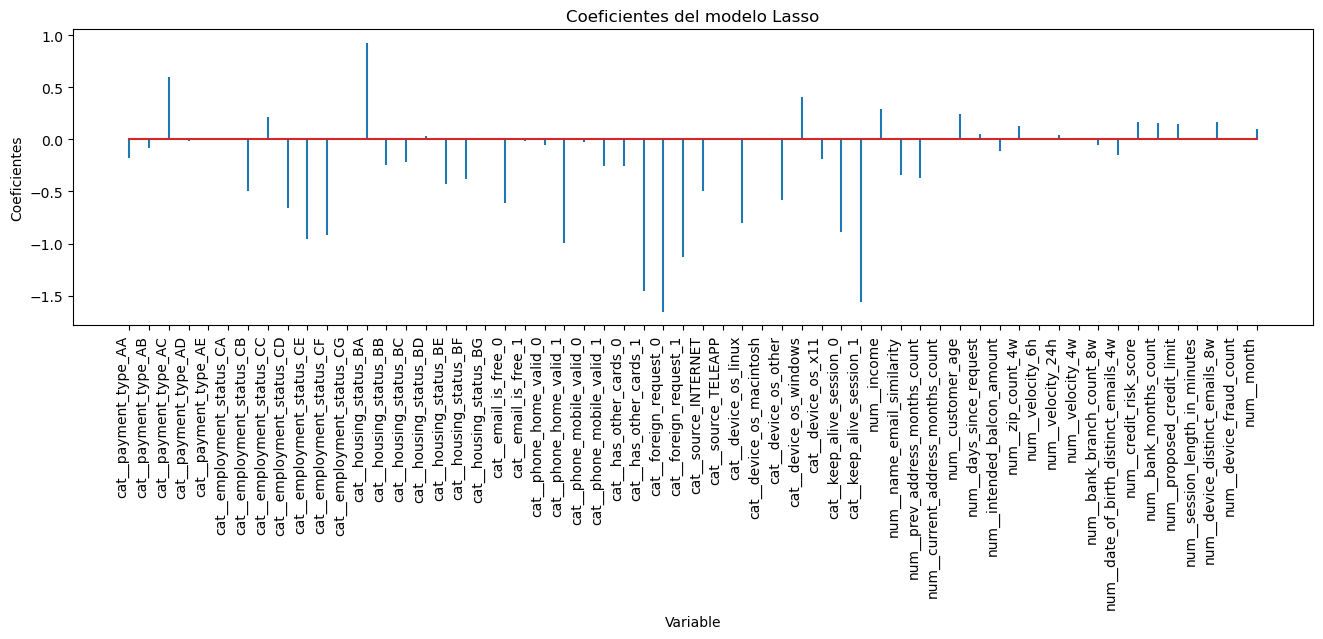

In [26]:
fig, ax = plt.subplots(figsize=(16, 3.84))
ax.stem(df_coeficientes_lasso.predictor, df_coeficientes_lasso.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('Variable')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes del modelo Lasso')
plt.show()

Ahora utilizaremos un Ramdon forest sin ajustar hiperparámetros con el mismo objetivo. Entrenamos el modelo.

In [27]:
rf_clf = RandomForestClassifier(random_state=2408)
rf_clf.fit(pd_fraud_transformed, y_pd_fraud_train)

RandomForestClassifier(random_state=2408)

Guardamos el modelo entrenado en un pickle.

In [28]:
with open('../models/random_forest_classifierSelecciónVariables.pkl', 'wb') as file:
    pickle.dump(rf_clf, file)

Obtenemos la importancia de cada característica según el modelo.

In [29]:
feature_importance_rf = rf_clf.feature_importances_

Normalizamos las importancias de las características dividiéndolas por el valor máximo de importancia en feature_importance_rf.
Multiplicar por 100.0 escala los valores para que estén en términos porcentuales, con el más importante siendo 100.
Esta normalización facilita la comparación y visualización, poniendo todas las importancias en una escala relativa.

In [30]:
feature_importance_rf = 100.0 * (feature_importance_rf / feature_importance_rf.max())
sorted_idx_rf = np.argsort(feature_importance_rf)
pos_rf = np.arange(sorted_idx_rf.shape[0]) + .5

Visualizamos los datos

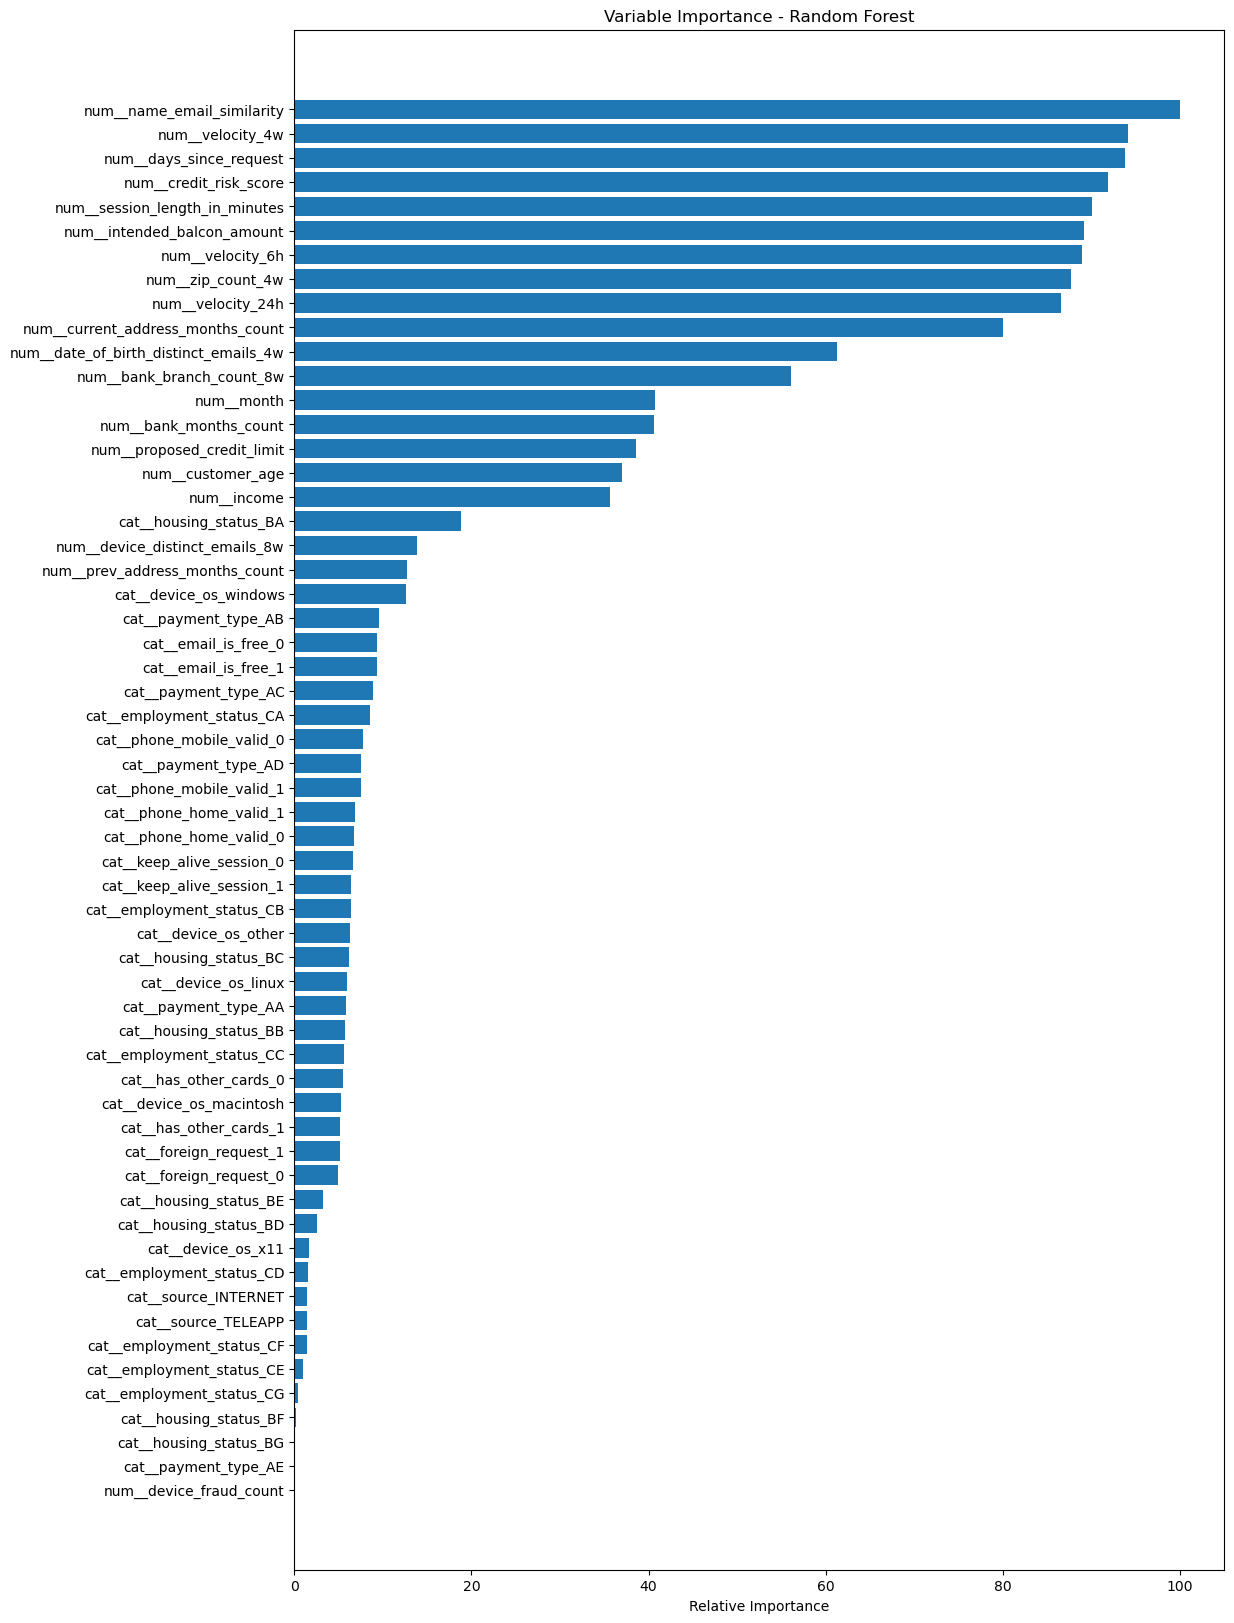

In [31]:
plt.figure(figsize=(12, 20))
plt.barh(pos_rf, feature_importance_rf[sorted_idx_rf], align='center')
plt.yticks(pos_rf, pd_fraud_transformed.keys()[
sorted_idx_rf])
plt.xlabel('Relative Importance')
plt.title('Variable Importance - Random Forest')
plt.show()

En nuestro análisis del modelo Random Forest, hemos identificado que la variable device_fraud_count debe ser eliminada. Este criterio se basa en la observación de que tanto en la regresión LASSO como en Random Forest, esta variable es consistentemente considerada no importante.

Al examinar las características categóricas, notamos una dinámica interesante: Random Forest asigna poca importancia a ciertas categorías dentro de las variables, sin embargo,esto no se aplica uniformemente a todas las categorías de una misma variable. Un ejemplo claro es la variable payment_type. Dentro de esta, la categoría payment_type_AE no es relevante según el modelo Random Forest, pero la categoría payment_type_AB sí lo es. Por lo tanto mantenemos esas variables categóricas que tienen categorías con poca importancia en el RamdonForest ya que no podemos eliminar una categoría específica de una variable sin eliminar la variable completa.

Al contrastar los resultados de la regresión LASSO con los del Random Forest, se refuerza la decisión de eliminar device_fraud_count. Sin embargo, en cuanto a las demás variables, encontramos diferencias en la importancia asignada entre los dos modelos. Random Forest tiende a minimizar la relevancia de algunas categorías específicas dentro de las variables categóricas, mientras que LASSO además descarta algunas variables numéricas.

Sin embargo esas variables numéricas que LASSO descarta son importantes para el RamdonForest.

Un ejemplo notable es bank_branch_count_8w, que LASSO descarta pero Random Forest considera importante. Por lo tanto, decidimos mantener estas variables numéricas en el análisis, dado que su relevancia se manifiesta en el modelo Random Forest. Este enfoque subraya la importancia de evaluar las características desde múltiples perspectivas de modelado, asegurando una comprensión más profunda y matizada de su impacto en las predicciones.

Como podemos observar tiene sentido eliminar la variable device_fraud_count debido a que es una variable constante que no aporta información
y todos sus valores son 0.

In [32]:
pd_fraud_transformed['num__device_fraud_count'].value_counts()

num__device_fraud_count
0.0    800000
Name: count, dtype: int64

Ahora juntamos de nuevo las variables independientes con la variables objetivo y creamos dos dataframes que son el train y el test.
En ambos dataframes eliminamos la variable device_fraud_count.Lo hacemos sobre el original porque el preprocesamiento lo haremos posteriormente en la ingeniería de variables, pero ahora necesitabamos hacerlo debido a que la regression laso y el ramdon forest no son capaces de interpretar variables categóricas sin ser previamente transformadas a numéricas.

In [33]:
pd_fraud_train = pd.concat([X_pd_fraud_train, y_pd_fraud_train],axis=1)
pd_fraud_test = pd.concat([X_pd_fraud_test, y_pd_fraud_test],axis=1)

In [34]:
pd_fraud_train = pd_fraud_train.drop('device_fraud_count', axis=1)

In [35]:
pd_fraud_test = pd_fraud_test.drop('device_fraud_count', axis=1)

Guardamos estos dataframes en dos pickles.

In [36]:
pd_fraud_train.to_pickle("../data/pd_fraud_train.pkl")

In [38]:
pd_fraud_test.to_pickle("../data/pd_fraud_test.pkl")